<a href="https://colab.research.google.com/github/harperd/machine-learning/blob/master/notebooks/simple-linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In [0]:
# NumPy adds support for large, multi-dimensional arrays and matrices, along with a large collection 
# of high-level mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is a plotting library for the Python programming language and its numerical mathematics 
# extension NumPy. It provides an object-oriented API for embedding plots into applications using 
# general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.
import matplotlib.pyplot as plt

# Allow saving our graphs in the notebook
%matplotlib inline

# Pandas is a software library for data manipulation and analysis. In particular, it offers data 
# structures and operations for manipulating numerical tables and time series.
import pandas as pd

In [2]:
df_raw = pd.read_csv(
    'https://raw.githubusercontent.com/harperd/machine-learning/master/data/ex1data1.csv',
    header = None,
    names=['Population', 'Profit'],
    low_memory = False)
%time print(f"{len(df_raw.index)} rows read.")

97 rows read.
CPU times: user 459 µs, sys: 107 µs, total: 566 µs
Wall time: 478 µs


In [3]:
df_raw.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df_raw.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


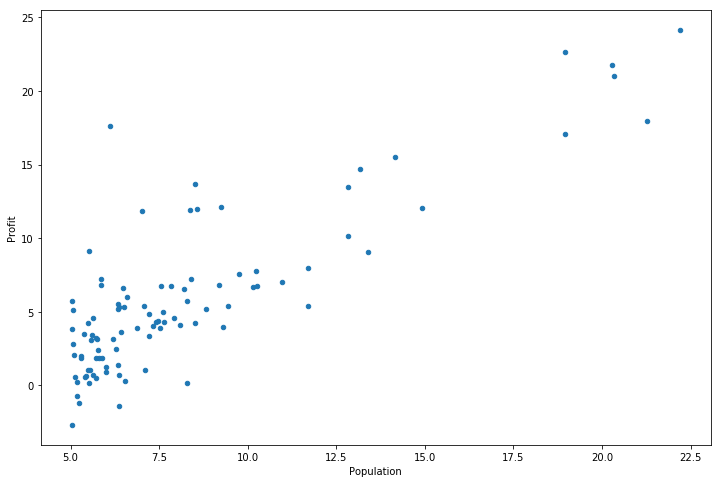

In [6]:
df_raw.plot(kind = 'scatter', x = 'Population', y = 'Profit', figsize = (12,8))

$\large J( \theta _{0} ,\ \theta _{1}) =\frac{1}{2m}\sum\limits ^{m}_{i=1}\left( h_{\theta }\left( x^{( i)}\right) -y^{( i)}\right)^{2}$

In [0]:
 def compute_cost(X, y, theta):
    hypothesis = X * theta.T
    loss = hypothesis - y
    sum_square = np.sum(np.square(loss))
    return sum_square / (2 * len(X))

In [8]:
# Append a ones column (bias column) to the beginning
# of the DataFrame. This will be used when computing
# the hypothesis.
if 'Ones' not in df_raw:
  df_raw.insert(0, 'Ones', 1)

# Set X (independent/training variable) 
# and y (dependent/target variable)
cols = df_raw.shape[1]
X = df_raw.iloc[:,0:cols-1]
y = df_raw.iloc[:,cols-1:cols]

# Convert from DataFrames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

print(f'Cost = {compute_cost(X, y, theta)}')

Cost = 32.072733877455676
